<a href="https://colab.research.google.com/github/rockerritesh/1st-project-NEPAL-Nepali_devanagari_Classifier-Ka-Kha-Ga---Ek-Dui-Tin-/blob/master/Nepali_numeric_letter_classifier(_ek_dui_tin_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/test/00/
 extracting: dataset/test/00/001_01.jpg  
 extracting: dataset/test/00/001_02.jpg  
  inflating: dataset/test/00/001_03.jpg  
 extracting: dataset/test/00/001_04.jpg  
 extracting: dataset/test/00/001_05.jpg  
 extracting: dataset/test/00/001_06.jpg  
 extracting: dataset/test/00/001_07.jpg  
  inflating: dataset/test/00/001_08.jpg  
 extracting: dataset/test/00/001_09.jpg  
 extracting: dataset/test/00/001_10.jpg  
 extracting: dataset/test/00/001_11.jpg  
 extracting: dataset/test/00/001_12.jpg  
 extracting: dataset/test/00/001_13.jpg  
 extracting: dataset/test/00/001_14.jpg  
 extracting: dataset/test/00/001_15.jpg  
 extracting: dataset/test/00/001_16.jpg  
 extracting: dataset/test/00/001_17.jpg  
 extracting: dataset/test/00/001_18.jpg  
 extracting: dataset/test/00/001_19.jpg  
 extracting: dataset/test/00/001_20.jpg  
 extracting: dataset/test/00/001_21.jpg  
 extracting: dataset/test/00/001_22.jpg

In [14]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(25, 25, 1), activation="relu"))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))
# Step 2 - Pooling
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))

# Step 2 - Pooling
classifier.add(Conv2D(128, (3, 3), activation="relu"))
#classifier.add(Conv2D(128, (3, 3), activation="relu"))
#classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128,activation="relu"))
classifier.add(Dense(activation="softmax", units=10))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 23, 23, 32)        320       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 2, 2, 128)        

In [16]:

# Part 2 -Fitting the CNN tothe images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (25, 25),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale' )


Found 2880 images belonging to 10 classes.


In [18]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (25, 25),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                           , color_mode='grayscale')

Found 1608 images belonging to 10 classes.


In [24]:
classifier.fit(training_set,
                        # steps_per_epoch = 800,
                         epochs = 25,
                         validation_data = test_set)
                         #validation_steps = 200)

Epoch 1/25
90/90 [==============================] - 3s 28ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0444 - val_accuracy: 0.9832
Epoch 2/25
90/90 [==============================] - 3s 28ms/step - loss: 0.0678 - accuracy: 0.9757 - val_loss: 0.0110 - val_accuracy: 0.9956
Epoch 3/25
90/90 [==============================] - 2s 27ms/step - loss: 0.0438 - accuracy: 0.9847 - val_loss: 0.0197 - val_accuracy: 0.9932
Epoch 4/25
90/90 [==============================] - 3s 28ms/step - loss: 0.0460 - accuracy: 0.9830 - val_loss: 0.0725 - val_accuracy: 0.9807
Epoch 5/25
90/90 [==============================] - 3s 29ms/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 6/25
90/90 [==============================] - 3s 28ms/step - loss: 0.0544 - accuracy: 0.9799 - val_loss: 0.0239 - val_accuracy: 0.9938
Epoch 7/25
90/90 [==============================] - 2s 27ms/step - loss: 0.0504 - accuracy: 0.9833 - val_loss: 0.0064 - val_accuracy: 0.9981
Epoch 8/25
90

In [60]:
classifier.save('nepalinumberclassifier.h5')

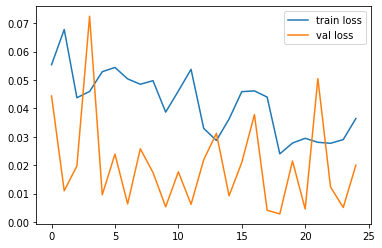

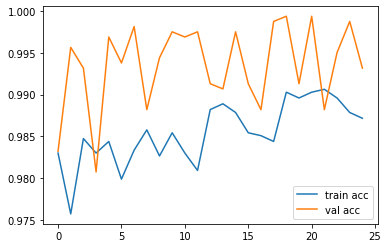

<Figure size 432x288 with 0 Axes>

In [28]:
# loss
plt.plot(classifier.history.history['loss'], label='train loss')
plt.plot(classifier.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(classifier.history.history['accuracy'], label='train acc')
plt.plot(classifier.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


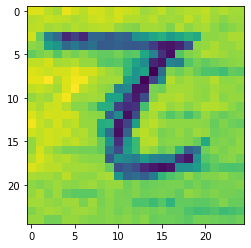

In [58]:
path="8.png"  #enter  path of predecting image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
test=load_img(path,grayscale=True,target_size=(25,25))
test1 = img_to_array(test)
test1.shape
import matplotlib.pyplot as plt

plt.imshow(test1.reshape(25,25))
test1=test1/255  

In [59]:
y=classifier.predict(test1.reshape(1,25,25,1))
import numpy as np

p=np.argmax(y)
p

8